In [ ]:
!git clone 'https://github.com/Shenggan/BCCD_Dataset.git'

#**DATA PRE-PROCESSING STARTS**

# Extraction of data labels from .xml file to dataframe

In [2]:
import shutil
import os, sys, random
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile
import pandas as pd
from sklearn import preprocessing, model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import numpy as np
import os

In [17]:
annotations = sorted(glob(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\Annotations\mix\*.xml'))

df = []
cnt = 0
for file in annotations:
  prev_filename = file.split('\\')[-1].split('.')[0] + '.png'
  filename = str(cnt) + '.png'
  row = []
  parsedXML = ET.parse(file)
  for node in parsedXML.getroot().iter('object'):
    CTC_cells = node.find('name').text
    xmin = int(node.find('bndbox/xmin').text)
    xmax = int(node.find('bndbox/xmax').text)
    ymin = int(node.find('bndbox/ymin').text)
    ymax = int(node.find('bndbox/ymax').text)

    row = [prev_filename, filename, CTC_cells, xmin, xmax, ymin, ymax]
    df.append(row)
  cnt += 1

data = pd.DataFrame(df, columns=['prev_filename', 'filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax'])

data[['prev_filename','filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_dectection.csv', index=False)


In [16]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
from glob import glob

# Get all annotation files
annotations = sorted(glob(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\Annotations\mix\*.xml'))

df = []
cnt = 0

for file in annotations:
    # Extract the previous filename and construct the new filename
    prev_filename = file.split('\\')[-1].split('.')[0] + '.png'
    # Extract the first number before the first underscore for the filename
    first_number = prev_filename.split('_')[0]  # Get the first number
    filename = f"{first_number}.png"  # Construct the new filename
    row = []
    
    # Parse the XML file
    parsedXML = ET.parse(file)
    for node in parsedXML.getroot().iter('object'):
        CTC_cells = node.find('name').text
        xmin = int(node.find('bndbox/xmin').text)
        xmax = int(node.find('bndbox/xmax').text)
        ymin = int(node.find('bndbox/ymin').text)
        ymax = int(node.find('bndbox/ymax').text)

        # Create a row with the desired format
        row = [prev_filename, filename, CTC_cells, xmin, xmax, ymin, ymax]
        df.append(row)
    
    cnt += 1

# Create a DataFrame and save to CSV
data = pd.DataFrame(df, columns=['prev_filename', 'filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax'])
data[['prev_filename', 'filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv(
    r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection.csv', index=False
)

Scaling the x,y - min,max as yolov5 accept 640 image

In [5]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
from glob import glob

# Get all annotation files
annotations = sorted(glob(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\Annotations\mix\*.xml'))

df = []
cnt = 0

# Scaling factors for resizing from 540x540 to 640x640
scale_x = 640 / 540
scale_y = 640 / 540

for file in annotations:
    # Extract the previous filename and construct the new filename
    prev_filename = file.split('\\')[-1].split('.')[0] + '.png'
    # Extract the first number before the first underscore for the filename
    first_number = prev_filename.split('_')[0]  # Get the first number
    filename = f"{first_number}.png"  # Construct the new filename
    
    # Parse the XML file
    parsedXML = ET.parse(file)
    for node in parsedXML.getroot().iter('object'):
        CTC_cells = node.find('name').text
        xmin = int(node.find('bndbox/xmin').text)
        xmax = int(node.find('bndbox/xmax').text)
        ymin = int(node.find('bndbox/ymin').text)
        ymax = int(node.find('bndbox/ymax').text)

        # Scale the coordinates
        xmin_scaled = round(xmin * scale_x)
        xmax_scaled = round(xmax * scale_x)
        ymin_scaled = round(ymin * scale_y)
        ymax_scaled = round(ymax * scale_y)

        # Create a row with the desired format
        row = [prev_filename, filename, CTC_cells, xmin_scaled, xmax_scaled, ymin_scaled, ymax_scaled]
        df.append(row)
    
    cnt += 1

# Create a DataFrame and save to CSV
data = pd.DataFrame(df, columns=['prev_filename', 'filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax'])
data[['prev_filename', 'filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv(
    r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection.csv', index=False
)

# Processing data as per the YOLO_V5 format

**DATAFRAME STRUCTURE**

- filename : contains the name of the image
- cell_type: denotes the type of the cell
- xmin: x-coordinate of the bottom left part of the image
- xmax: x-coordinate of the top right part of the image
- ymin: y-coordinate of the bottom left part of the image
- ymax: y-coordinate of the top right part of the image
- labels : Encoded cell-type **(Yolo - label input-1)**
- width : width of that bbox
- height : height of that bbox
- x_center : bbox center (x-axis)
-	y_center : bbox center (y-axis)
-	x_center_norm	: x_center normalized (0-1) **(Yolo - label input-2)**
-	y_center_norm : y_center normalized (0-1) **(Yolo - label input-3)**
- width_norm : width normalized (0-1) **(Yolo - label input-4)**
-	height_norm : height normalized (0-1) **(Yolo - label input-5)**

# Convert .tiff to png

In [17]:
import os
from PIL import Image

def convert_tiff_to_png(source_directory, target_directory):
    # Create the target directory if it doesn't exist
    os.makedirs(target_directory, exist_ok=True)

    for filename in os.listdir(source_directory):
        if filename.lower().endswith('.tiff') or filename.lower().endswith('.tif'):
            tiff_file_path = os.path.join(source_directory, filename)
            png_file_path = os.path.join(target_directory, os.path.splitext(filename)[0] + '.png')
            
            # Open the TIFF image and save it as PNG
            with Image.open(tiff_file_path) as img:
                img.save(png_file_path, 'PNG')
                print(f'Converted {filename} to {os.path.basename(png_file_path)}')

# Specify the source directory containing the .tiff files
source_directory_path = r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\raw_images_for_model\fluorescence'
# Specify the target directory to save .png files
target_directory_path = r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\raw_images_for_model\fluorescence_png'

convert_tiff_to_png(source_directory_path, target_directory_path)

Converted r06c04f01p01.tiff to r06c04f01p01.png
Converted r06c04f02p01.tiff to r06c04f02p01.png
Converted r06c04f03p01.tiff to r06c04f03p01.png
Converted r06c04f04p01.tiff to r06c04f04p01.png
Converted r06c04f05p01.tiff to r06c04f05p01.png
Converted r06c04f06p01.tiff to r06c04f06p01.png
Converted r06c04f07p01.tiff to r06c04f07p01.png
Converted r06c04f08p01.tiff to r06c04f08p01.png
Converted r06c04f09p01.tiff to r06c04f09p01.png
Converted r06c04f100p01.tiff to r06c04f100p01.png
Converted r06c04f101p01.tiff to r06c04f101p01.png
Converted r06c04f102p01.tiff to r06c04f102p01.png
Converted r06c04f103p01.tiff to r06c04f103p01.png
Converted r06c04f104p01.tiff to r06c04f104p01.png
Converted r06c04f105p01.tiff to r06c04f105p01.png
Converted r06c04f106p01.tiff to r06c04f106p01.png
Converted r06c04f107p01.tiff to r06c04f107p01.png
Converted r06c04f108p01.tiff to r06c04f108p01.png
Converted r06c04f109p01.tiff to r06c04f109p01.png
Converted r06c04f10p01.tiff to r06c04f10p01.png
Converted r06c04f110

In [28]:
import os
from PIL import Image

def convert_tiff_to_png(source_directory, target_directory):
    # Create the target directory if it doesn't exist
    os.makedirs(target_directory, exist_ok=True)

    for filename in os.listdir(source_directory):
        if filename.lower().endswith('.tiff') or filename.lower().endswith('.tif'):
            tiff_file_path = os.path.join(source_directory, filename)
            png_file_path = os.path.join(target_directory, os.path.splitext(filename)[0] + '.png')
            
            # Open the TIFF image and save it as PNG
            with Image.open(tiff_file_path) as img:
                img.save(png_file_path, 'PNG')
                print(f'Converted {filename} to {os.path.basename(png_file_path)}')

# Specify the source directory containing the .tiff files
source_directory_path = r"D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\raw_images_for_model\brightfield - Copy"
# Specify the target directory to save .png files
target_directory_path = r"D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\raw_images_for_model\brightfield_png"

convert_tiff_to_png(source_directory_path, target_directory_path)

Converted r06c04f01p01.tiff to r06c04f01p01.png
Converted r06c04f02p01.tiff to r06c04f02p01.png
Converted r06c04f03p01.tiff to r06c04f03p01.png
Converted r06c04f04p01.tiff to r06c04f04p01.png
Converted r06c04f05p01.tiff to r06c04f05p01.png
Converted r06c04f06p01.tiff to r06c04f06p01.png
Converted r06c04f07p01.tiff to r06c04f07p01.png
Converted r06c04f08p01.tiff to r06c04f08p01.png
Converted r06c04f09p01.tiff to r06c04f09p01.png
Converted r06c04f100p01.tiff to r06c04f100p01.png
Converted r06c04f101p01.tiff to r06c04f101p01.png
Converted r06c04f102p01.tiff to r06c04f102p01.png
Converted r06c04f103p01.tiff to r06c04f103p01.png
Converted r06c04f104p01.tiff to r06c04f104p01.png
Converted r06c04f105p01.tiff to r06c04f105p01.png
Converted r06c04f106p01.tiff to r06c04f106p01.png
Converted r06c04f107p01.tiff to r06c04f107p01.png
Converted r06c04f108p01.tiff to r06c04f108p01.png
Converted r06c04f109p01.tiff to r06c04f109p01.png
Converted r06c04f10p01.tiff to r06c04f10p01.png
Converted r06c04f110

# resize image

In [8]:
import cv2
import os

# Specify the folder containing the images
folder_path = r"D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\raw_images_for_model\fluorescence_png resized"
target_size = (640, 640)

for filename in os.listdir(folder_path):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Add other formats if needed
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path)
        
        if img is not None:  # Check if the image is loaded properly
            # Resize the image
            resized_image = cv2.resize(img, target_size)

            # Save the resized image (you can overwrite or save to a new file)
            cv2.imwrite(image_path, resized_image)  # Overwrite the original
            # Alternatively, save to a new file:
            # cv2.imwrite(os.path.join(folder_path, 'resized_' + filename), resized_image)

## Check all img shape

In [9]:
from PIL import Image
import os

# Specify the folder containing the images
folder_path = r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\raw_images_for_model\fluorescence_png resized'

# Initialize variables to store the shape of the first image
first_image_shape = None
all_same_shape = True

for filename in os.listdir(folder_path):
    if filename.endswith('.png'):  # Only process .png files
        image_path = os.path.join(folder_path, filename)
        with Image.open(image_path) as img:
            current_shape = img.size  # (width, height)
            if first_image_shape is None:
                first_image_shape = current_shape
            elif first_image_shape != current_shape:
                all_same_shape = False
                print(f"Image {filename} has a different shape: {current_shape}")

if all_same_shape:
    print("All images have the same shape:", first_image_shape)
else:
    print("Not all images have the same shape.")

All images have the same shape: (640, 640)


In [18]:
#Old code
img_width = 640 #change to match the image width of the dataset in bbox format
img_height = 640

def width(df):
  return int(df.xmax - df.xmin)
def height(df):
  return int(df.ymax - df.ymin)
def x_center(df):
  return int(df.xmin + (df.width/2))
def y_center(df):
  return int(df.ymin + (df.height/2))
def w_norm(df):
  return df/img_width
def h_norm(df):
  return df/img_height

df = pd.read_csv(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection.csv')

le = preprocessing.LabelEncoder()
le.fit(df['cell_type'])
print(le.classes_)
labels = le.transform(df['cell_type'])
df['labels'] = labels

df['width'] = df.apply(width, axis=1)
df['height'] = df.apply(height, axis=1)

df['x_center'] = df.apply(x_center, axis=1)
df['y_center'] = df.apply(y_center, axis=1)

df['x_center_norm'] = df['x_center'].apply(w_norm)
df['width_norm'] = df['width'].apply(w_norm)

df['y_center_norm'] = df['y_center'].apply(h_norm)
df['height_norm'] = df['height'].apply(h_norm)

df.head(30)

['G' 'R' 'U']


,prev_filename,filename,cell_type,xmin,xmax,ymin,ymax,labels,width,height,x_center,y_center,x_center_norm,width_norm,y_center_norm,height_norm
0,0_r06c04f01p01.png,0.png,G,1,15,1,36,0,14,35,8,18,0.012500,0.021875,0.028125,0.054688
1,0_r06c04f01p01.png,0.png,U,4,33,9,39,2,29,30,18,24,0.028125,0.045312,0.037500,0.046875
2,0_r06c04f01p01.png,0.png,R,1,29,45,83,1,28,38,15,64,0.023438,0.043750,0.100000,0.059375
3,0_r06c04f01p01.png,0.png,G,88,143,6,56,0,55,50,115,31,0.179688,0.085938,0.048438,0.078125
4,0_r06c04f01p01.png,0.png,G,67,103,1,24,0,36,23,85,12,0.132812,0.056250,0.018750,0.035937
5,0_r06c04f01p01.png,0.png,U,44,74,1,10,2,30,9,59,5,0.092188,0.046875,0.007812,0.014063
6,0_r06c04f01p01.png,0.png,U,146,177,60,95,2,31,35,161,77,0.251563,0.048438,0.120313,0.054688
7,0_r06c04f01p01.png,0.png,R,174,201,78,104,1,27,26,187,91,0.292187,0.042188,0.142187,0.040625
8,0_r06c04f01p01.png,0.png,U,204,234,73,110,2,30,37,219,91,0.342187,0.046875,0.142187,0.057813
9,0_r06c04f01p01.png,0.png,U,170,211,31,73,2,41,42,190,52,0.296875,0.064062,0.081250,0.065625


In [7]:
#new normalize coordinates code
import pandas as pd
from sklearn import preprocessing

img_width = 640  # Change to match the image width of the dataset in bbox format
img_height = 640  # Change to match the image height

def width(df):
    return int(df.xmax - df.xmin)

def height(df):
    return int(df.ymax - df.ymin)

def x_center(df):
    return int(df.xmin + (df.width / 2))

def y_center(df):
    return int(df.ymin + (df.height / 2))

def w_norm(w):
    return w / img_width

def h_norm(h):
    return h / img_height

# Load your dataset
df = pd.read_csv(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection.csv')

# Label encoding
le = preprocessing.LabelEncoder()
le.fit(df['cell_type'])
labels = le.transform(df['cell_type'])
df['labels'] = labels

# Calculate width and height
df['width'] = df.apply(width, axis=1)
df['height'] = df.apply(height, axis=1)

# Calculate centers
df['x_center'] = df.apply(x_center, axis=1)
df['y_center'] = df.apply(y_center, axis=1)

# Normalize
df['x_center_norm'] = df['x_center'] / img_width
df['width_norm'] = df['width'] / img_width
df['y_center_norm'] = df['y_center'] / img_height
df['height_norm'] = df['height'] / img_height

# Display the first 30 rows
df.head(30)

,prev_filename,filename,cell_type,xmin,xmax,ymin,ymax,labels,width,height,x_center,y_center,x_center_norm,width_norm,y_center_norm,height_norm
0,0_r06c04f01p01.png,0.png,G,1,18,1,43,0,17,42,9,22,0.014063,0.026562,0.034375,0.065625
1,0_r06c04f01p01.png,0.png,U,5,39,11,46,2,34,35,22,28,0.034375,0.053125,0.043750,0.054688
2,0_r06c04f01p01.png,0.png,R,1,34,53,98,1,33,45,17,75,0.026562,0.051562,0.117188,0.070312
3,0_r06c04f01p01.png,0.png,G,104,169,7,66,0,65,59,136,36,0.212500,0.101562,0.056250,0.092188
4,0_r06c04f01p01.png,0.png,G,79,122,1,28,0,43,27,100,14,0.156250,0.067187,0.021875,0.042188
5,0_r06c04f01p01.png,0.png,U,52,88,1,12,2,36,11,70,6,0.109375,0.056250,0.009375,0.017188
6,0_r06c04f01p01.png,0.png,U,173,210,71,113,2,37,42,191,92,0.298438,0.057813,0.143750,0.065625
7,0_r06c04f01p01.png,0.png,R,206,238,92,123,1,32,31,222,107,0.346875,0.050000,0.167187,0.048438
8,0_r06c04f01p01.png,0.png,U,242,277,87,130,2,35,43,259,108,0.404687,0.054688,0.168750,0.067187
9,0_r06c04f01p01.png,0.png,U,201,250,37,87,2,49,50,225,62,0.351562,0.076563,0.096875,0.078125


In [8]:
df.to_csv(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_dectection_check_norm.csv', index=False)

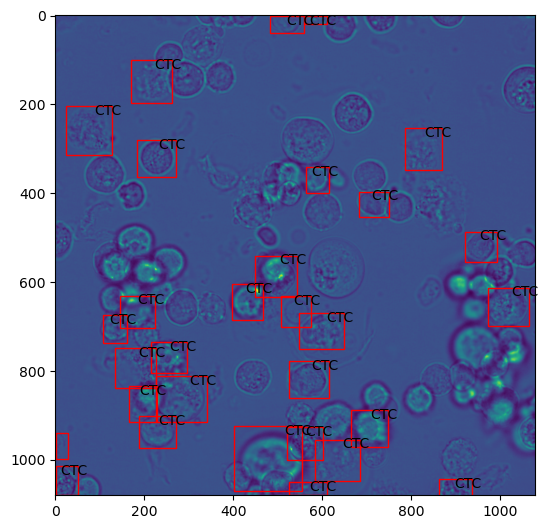

In [21]:
#@title SAMPLE PLOT - shape (480, 640, 3)
fig = plt.figure()
import cv2
#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
# image = plt.imread(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\raw_images_for_model\brightfield_png\0_r06c04f01p01.png')
# normalized_image = cv2.resize(image, (int(image.shape[1] / 2), int(image.shape[0] / 2)), interpolation=cv2.INTER_AREA)
# plt.imshow(normalized_image)
image = plt.imread(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\raw_images_for_model\brightfield_png\445_r06c04f525p01.png')
plt.imshow(image)
# iterating over the image for different objects
for _,row in df[df.filename == "445.png"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'R': #CTC cells
        edgecolor = 'r'
        ax.annotate('CTC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'G': #normal cells
        edgecolor = 'g'
        ax.annotate('Normal', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'U':  #unknown cells
        edgecolor = 'b'
        ax.annotate('Unknown', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [9]:
image_resized = plt.imread(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\raw_images_for_model\brightfield_png resized\0_r06c04f01p01.png')
image_before = plt.imread(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\raw_images_for_model\brightfield_png\0_r06c04f01p01.png')
print(image_resized.shape)
print(image_before.shape)

(640, 640, 3)
(1080, 1080)


# Splitting into training and validation datasets

In [10]:
df_train, df_valid = model_selection.train_test_split(df, test_size=0.2, random_state=13, shuffle=True)
print(df_train.shape, df_valid.shape)

(67604, 16) (16901, 16)


In [11]:
df_train

,prev_filename,filename,cell_type,xmin,xmax,ymin,ymax,labels,width,height,x_center,y_center,x_center_norm,width_norm,y_center_norm,height_norm
25910,265_r06c04f343p01.png,265.png,U,321,370,311,364,2,49,53,345,337,0.539062,0.076563,0.526563,0.082812
56647,651_r07c04f213p01.png,651.png,R,174,212,26,70,1,38,44,193,48,0.301563,0.059375,0.075000,0.068750
57694,666_r07c04f227p01.png,666.png,U,132,175,79,119,2,43,40,153,99,0.239063,0.067187,0.154688,0.062500
53034,607_r07c04f173p01.png,607.png,U,296,334,473,510,2,38,37,315,491,0.492188,0.059375,0.767188,0.057813
53949,619_r07c04f184p01.png,619.png,U,152,204,128,177,2,52,49,178,152,0.278125,0.081250,0.237500,0.076563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36794,391_r06c04f471p01.png,391.png,R,217,263,56,94,1,46,38,240,75,0.375000,0.071875,0.117188,0.059375
25324,258_r06c04f337p01.png,258.png,G,311,350,193,222,0,39,29,330,207,0.515625,0.060937,0.323437,0.045312
65689,764_r07c04f317p01.png,764.png,G,474,520,273,320,0,46,47,497,296,0.776563,0.071875,0.462500,0.073438
33634,355_r06c04f439p01.png,355.png,G,98,161,39,97,0,63,58,129,68,0.201563,0.098437,0.106250,0.090625


In [12]:
df_valid

,prev_filename,filename,cell_type,xmin,xmax,ymin,ymax,labels,width,height,x_center,y_center,x_center_norm,width_norm,y_center_norm,height_norm
73522,862_r07c04f406p01.png,862.png,U,617,640,572,617,2,23,45,628,594,0.981250,0.035937,0.928125,0.070312
36300,386_r06c04f467p01.png,386.png,U,393,431,532,567,2,38,35,412,549,0.643750,0.059375,0.857812,0.054688
69271,808_r07c04f357p01.png,808.png,R,529,563,21,52,1,34,31,546,36,0.853125,0.053125,0.056250,0.048438
29413,305_r06c04f393p01.png,305.png,G,467,511,151,198,0,44,47,489,174,0.764062,0.068750,0.271875,0.073438
71056,831_r07c04f378p01.png,831.png,U,166,200,315,352,2,34,37,183,333,0.285938,0.053125,0.520312,0.057813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46730,530_r06c04f97p01.png,530.png,R,553,595,13,50,1,42,37,574,31,0.896875,0.065625,0.048438,0.057813
61946,718_r07c04f274p01.png,718.png,G,239,288,619,640,0,49,21,263,629,0.410938,0.076563,0.982812,0.032813
38108,405_r06c04f484p01.png,405.png,R,574,617,305,344,1,43,39,595,324,0.929688,0.067187,0.506250,0.060937
18943,181_r06c04f267p01.png,181.png,G,201,242,353,399,0,41,46,221,376,0.345313,0.064062,0.587500,0.071875


In [ ]:
#os.mkdir(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection')
os.mkdir(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\images')
os.mkdir(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\images\train')
os.mkdir(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\images\valid')

os.mkdir(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\labels')
os.mkdir(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\labels\train')
os.mkdir(r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\labels\valid')

In [21]:
import os

# Define the base path for the new directories
base_path = r'D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection'

# Create directories with existence check
os.makedirs(os.path.join(base_path, 'images', 'train'), exist_ok=True)
os.makedirs(os.path.join(base_path, 'images', 'valid'), exist_ok=True)
os.makedirs(os.path.join(base_path, 'labels', 'train'), exist_ok=True)
os.makedirs(os.path.join(base_path, 'labels', 'valid'), exist_ok=True)

# Optionally, you can create the base images and labels directories if needed
os.makedirs(os.path.join(base_path, 'images'), exist_ok=True)
os.makedirs(os.path.join(base_path, 'labels'), exist_ok=True)

# Data segregation and moving to it's corresponding folders
- Brightfield image
  - Images
    - Train (364 images [.jpg files])
    - Valid (270 images [.jpg files])
  - Labels
    - Train (364 labels [.txt files])
    - Valid (270 labels [.txt files])


**STRUCTURE OF .txt FILE**

- One row per object
- Each row is class x_center y_center width height format.
- Box coordinates must be in normalized xywh format (from 0 - 1). If your boxes  are in pixels, divide x_center and width by image width, and y_center and height by image height.
- Class numbers are zero-indexed (start from 0).


<img src="https://github.com/bala-codes/Yolo-v5_Object_Detection_Blood_Cell_Count_and_Detection/blob/master/imgs/label_txt.PNG?raw=true" width="50%">


In [22]:
def segregate_data(df, img_path, label_path, train_img_path, train_label_path):
  filenames = []
  for filename in df.filename:
    filenames.append(filename)
  filenames = set(filenames)
  
  for filename in filenames:
    yolo_list = []

    for _,row in df[df.filename == filename].iterrows():
      yolo_list.append([row.labels, row.x_center_norm, row.y_center_norm, row.width_norm, row.height_norm])

    yolo_list = np.array(yolo_list)
    txt_filename = os.path.join(train_label_path,str(row.prev_filename.split('.')[0])+".txt")
    # Save the .img & .txt files to the corresponding train and validation folders
    np.savetxt(txt_filename, yolo_list, fmt=["%d", "%f", "%f", "%f", "%f"])
    shutil.copyfile(os.path.join(img_path,row.prev_filename), os.path.join(train_img_path,row.prev_filename))

test

In [11]:
import numpy as np
import shutil
import os

def segregate_data(df, img_path, label_path, train_img_path, train_label_path):
    # Create a set of unique filenames
    filenames = set(df['filename'])

    for filename in filenames:
        yolo_list = []

        # Iterate through the DataFrame for rows matching the current filename
        for _, row in df[df['filename'] == filename].iterrows():
            # Create a YOLO format entry
            yolo_list.append([row['labels'], row['x_center_norm'], row['y_center_norm'], row['width_norm'], row['height_norm']])

        # Convert the list to a NumPy array for saving
        yolo_list = np.array(yolo_list)

        # Construct the output filename for the YOLO format text file
        txt_filename = os.path.join(train_label_path, f"{row['prev_filename'].split('.')[0]}.txt")

        # Save the YOLO formatted data to a .txt file
        np.savetxt(txt_filename, yolo_list, fmt=["%d", "%f", "%f", "%f", "%f"])

        # Copy the corresponding image to the training images folder
        shutil.copyfile(os.path.join(img_path, row['prev_filename']), os.path.join(train_img_path, row['prev_filename']))

# Example usage
# segregate_data(data_frame, img_path, label_path, train_img_path, train_label_path)

In [23]:

src_img_path = r"D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\raw_images_for_model\brightfield_png resized"
src_label_path = r"D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\Annotations\mix"

train_img_path = r"D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\images\train"
train_label_path = r"D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\labels\train"

valid_img_path = r"D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\images\valid"
valid_label_path = r"D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\labels\valid"


In [24]:
%%time
segregate_data(df_train, src_img_path, src_label_path, train_img_path, train_label_path)
segregate_data(df_valid, src_img_path, src_label_path, valid_img_path, valid_label_path)

CPU times: total: 7.59 s
Wall time: 24.1 s


In [26]:
try:
  shutil.rmtree('/content/bcc/images/train/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('/content/bcc/images/valid/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('/content/bcc/labels/train/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('/content/bcc/labels/valid/.ipynb_checkpoints')
except FileNotFoundError:
  pass

print("No. of Training images", len(os.listdir(train_img_path)))
print("No. of Training labels", len(os.listdir(train_label_path)))

print("No. of valid images", len(os.listdir(valid_img_path)))
print("No. of valid labels", len(os.listdir(valid_label_path)))

No. of Training images 967
No. of Training labels 967
No. of valid images 240
No. of valid labels 240


# **END OF DATA PRE-PROCESSING**

#**YOLO V5 STARTS**

In [ ]:
!mkdir -p '/content/drive/My Drive/Machine Learning Projects/YOLO/'
!cp -r '/content/bcc' '/content/drive/My Drive/Machine Learning Projects/YOLO/'

# Cloning from the yolo v5 repo.
More can be found at here : [yolo](https://github.com/ultralytics/yolov5)

In [21]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [24]:
pip install -r "D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\yolov5\requirements.txt"

   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   - -------------------------------------- 5.5/203.0 MB 25.8 MB/s eta 0:00:08
   -- ------------------------------------- 13.4/203.0 MB 31.1 MB/s eta 0:00:07
   ---- ----------------------------------- 22.3/203.0 MB 35.2 MB/s eta 0:00:06
   ------ --------------------------------- 30.7/203.0 MB 36.0 MB/s eta 0:00:05
   ------- -------------------------------- 39.6/203.0 MB 37.6 MB/s eta 0:00:05
   --------- ------------------------------ 48.2/203.0 MB 37.9 MB/s eta 0:00:05
   ----------- ---------------------------- 59.0/203.0 MB 39.6 MB/s eta 0:00:04
   ------------ --------------------------- 64.0/203.0 MB 37.7 MB/s eta 0:00:04
   ------------- -------------------------- 68.4/203.0 MB 35.8 MB/s eta 0:00:04
   -------------- ------------------------- 75.0/203.0 MB 35.2 MB/s eta 0:00:04
   ---------------- ----------------------- 83.4/203.0 MB 35.5 MB/s eta 0:00:04
   ----------------- ---------------------- 87.8/2

In [22]:
!pip install -qr '/yolov5/requirements.txt'  # install dependencies

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


# WE SHOULD CREATE A .yaml FILE AND THEN PLACE IT INSIDE THE yolov5 FOLDER

#**Contents of YAML file**

train: /content/bcc/images/train                    
val: /content/bcc/images/valid

nc: 3

names: ['Platelets', 'RBC', 'WBC']


<img src="https://github.com/bala-codes/Yolo-v5_Object_Detection_Blood_Cell_Count_and_Detection/blob/master/imgs/bcc_yaml.PNG?raw=true" width="50%">



In [1]:
!echo -e 'train: "D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\images\train"\nval: "D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\images\valid"\n\nnc: 3\nnames: ['R', 'G', 'B']' >> CTC.yaml
!cat 'CTC.yaml'

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
echo -e 'train: "D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\images\train"\nval: "D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\images\valid"\nnc: 3\nnames: ["G", "R", "U"]' > CTC.yaml

In [4]:
shutil.copyfile('/content/bcc.yaml', '/content/yolov5/bcc.yaml')

NameError: name 'shutil' is not defined

#**Also edit the number of classes (nc) in the ./models/*.yaml file**

Choose the yolo model of your choice, here I chose yolov5s.yaml (yolo - small)


In [ ]:
!sed -i 's/nc: 80/nc: 3/g' ./yolov5/models/yolov5s.yaml

<img src="https://cdn-images-1.medium.com/max/600/1*hCE5VwKkqHlZW466umYTTA.png">

# Training command

**Training Parameters**

!python 
- <'location of train.py file'> 
- --img <'width of image'>
- --batch <'batch size'>
- --epochs <'no of epochs'>
- --data <'location of the .yaml file'>
- --cfg <'Which yolo configuration you want'>(yolov5s/yolov5m/yolov5l/yolov5x).yaml | (small, medium, large, xlarge)
- --name <'Name of the best model after training'>

**METRICS FROM TRAINING PROCESS**

**No.of classes, No.of images, No.of targets, Precision (P), Recall (R), mean Average Precision (map)**
- Class | Images | Targets | P | R | mAP@.5 | mAP@.5:.95: |
- all   | 270    |     489 |    0.0899 |       0.827 |      0.0879 |      0.0551

In [1]:
%%time

!python "D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\yolov5\train.py" --img 540 --batch 8 --epochs 100 --data "D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\yolov5\CTC.yaml" --cfg "D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\yolov5\models\yolov5s.yaml" --name CTC_Model

CPU times: total: 15.6 ms
Wall time: 3min 8s


In [ ]:
# Start tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 52380), started 0:10:59 ago. (Use '!kill 52380' to kill it.)

#**INFERENCE**

In [ ]:
#Optimizer stripped from runs/exp2_BCCM/weights/last_BCCM.pt, 14.8MB
#Optimizer stripped from runs/exp2_BCCM/weights/best_BCCM.pt, 14.8MB

# BATCH PREDICTION
- Results saved to inference/output


**Inference Parameters**

!python 
- <'location of detect.py file'> 
- --source <'location of image/ folder to predict'>
- --weight <'location of the saved best weights'>
- --output <'location of output files after prediction'>

In [ ]:
!python r"D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\yolov5\detect.py" --source r"D:\FYP\CTC_CCA_dataset\CTC_CCA_dataset\CTC_cell_detection\images\valid" --weights '/content/runs/exp0_BCCM/weights/best.pt' --output '/content/inference/output'

In [ ]:
disp_images = glob('/content/inference/output/*')
fig=plt.figure(figsize=(20, 28))
columns = 3
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.choice(disp_images)
    img = plt.imread(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# SINGLE IMAGE PREDICTIONS


In [ ]:
output = !python yolov5/detect.py --source /content/bcc/images/valid/BloodImage_00000.jpg --weights '/content/runs/exp0_BCCM/weights/best_BCCM.pt'
print(output)

# You need these files, if you wish to move the model to production

## Files

In [ ]:
shutil.copyfile('/content/yolov5/detect.py', '/content/drive/My Drive/Machine Learning Projects/YOLO/SOURCE/detect.py')
shutil.copyfile('/content/yolov5/requirements.txt', '/content/drive/My Drive/Machine Learning Projects/YOLO/SOURCE/requirements.txt')
shutil.copyfile('/content/runs/exp2_BCCM/weights/best_BCCM.pt', '/content/drive/My Drive/Machine Learning Projects/YOLO/SOURCE/best_BCCM.pt')



## Folder

In [ ]:
!cp -r '/content/yolov5/models' '/content/drive/My Drive/Machine Learning Projects/YOLO/SOURCE/'
!cp -r '/content/yolov5/utils' '/content/drive/My Drive/Machine Learning Projects/YOLO/SOURCE/'
